# ALL RESULTS OF CLASSIFICATION

In [1]:
import sys
sys.path.append('..')

In [3]:
import torch
from celeb_classifier import MLPClassifierWrapper
from facenet_pytorch import InceptionResnetV1
from src.data_loader import FairFaceData, CelebData
from src.models import transformation, get_pretrained_model
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from torchvision.transforms.functional import to_pil_image

In [4]:
def get_metrics(path):
    metrics = pd.read_csv(path)
    print(f"Untrained Test Accuracy:\t{metrics['test_acc'][0] * 100:.4f}%")
    print(f"Final Test Accuracy:\t\t{metrics['test_acc'].to_numpy()[-1] * 100:.4f}%")

def plot_sample(model, sample, transform, device):
    model = model.to(device)
    model.eval()
    fig, axes = plt.subplots(2, 5, figsize = (30, 15))
    axes = axes.flatten()
    with torch.no_grad():
        for idx, ax in enumerate(axes):
            img, y = sample[idx]
            if y.item() == -1 or y.item() == 0:
                y = 0
            else:
                y = 1
            x = transform(img)
            x = x.to(device)
            yhat = model(x.unsqueeze(0))
            ax.set_title(f'Predicted: {round(yhat.item())}, Truth: {y}')
            ax.imshow(img)
    fig.show()

In [5]:
root = Path('..')
result_root = root / 'results'

In [6]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(f'Using {device} for inference')

Using cuda for inference


In [7]:
# load sample dataset
celeb_sample = CelebData(root = str(root), sample = True)

VGGFACE2

In [8]:
vgg_result_path = result_root / 'celeb_results_vggface2' / 'lightning_logs' / 'version_0'

In [9]:
get_metrics(str(vgg_result_path / 'metrics.csv'))

Untrained Test Accuracy:	39.0191%
Final Test Accuracy:		98.7699%


In [10]:
# run model
vggface_model = MLPClassifierWrapper.load_from_checkpoint(str(vgg_result_path / 'checkpoints' / 'epoch=3-val_loss=0.05.ckpt'))
# set trained model
vggface_model.trained_model = get_pretrained_model('vggface2', device)

C:\Users\johnd\AppData\Local\Temp\ipykernel_2344\3415888889.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


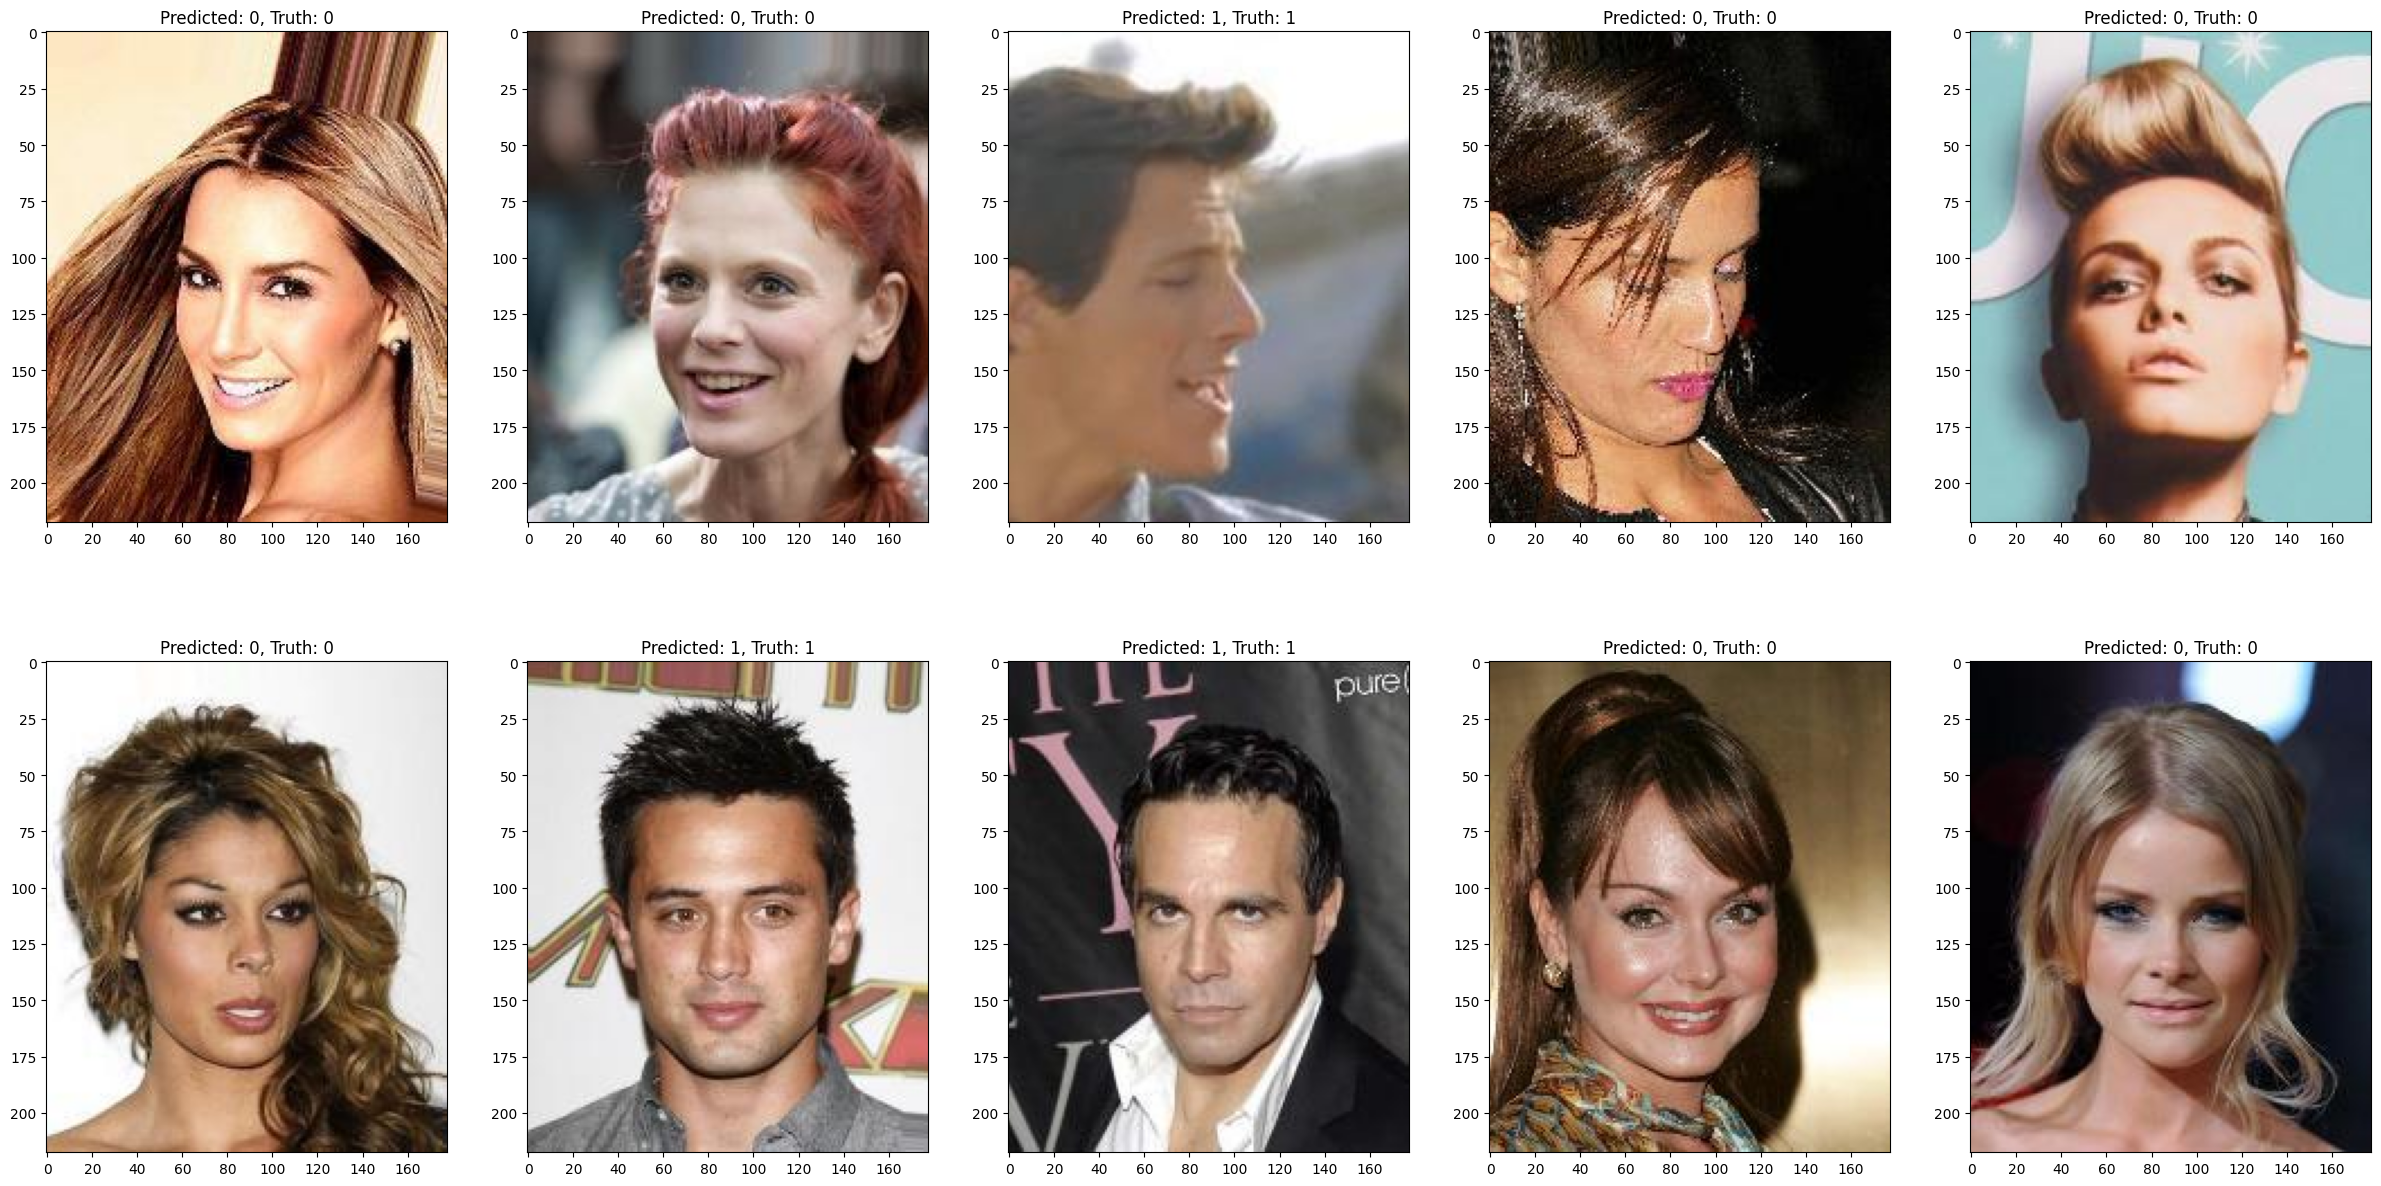

In [11]:
plot_sample(vggface_model, celeb_sample, transformation('vggface2'), device)

CASIA-WEBPAGE

In [14]:
casia_result_path = result_root / 'celeb_results_casia' / 'lightning_logs' / 'version_0'

In [15]:
get_metrics(str(casia_result_path / 'metrics.csv'))

Untrained Test Accuracy:	39.0191%
Final Test Accuracy:		97.4554%


In [16]:
# run model
casia_model = MLPClassifierWrapper.load_from_checkpoint(str(casia_result_path / 'checkpoints' / 'epoch=4-val_loss=0.08.ckpt'))
# set trained model
casia_model.trained_model = get_pretrained_model('casia', device)

C:\Users\johnd\AppData\Local\Temp\ipykernel_2344\3415888889.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


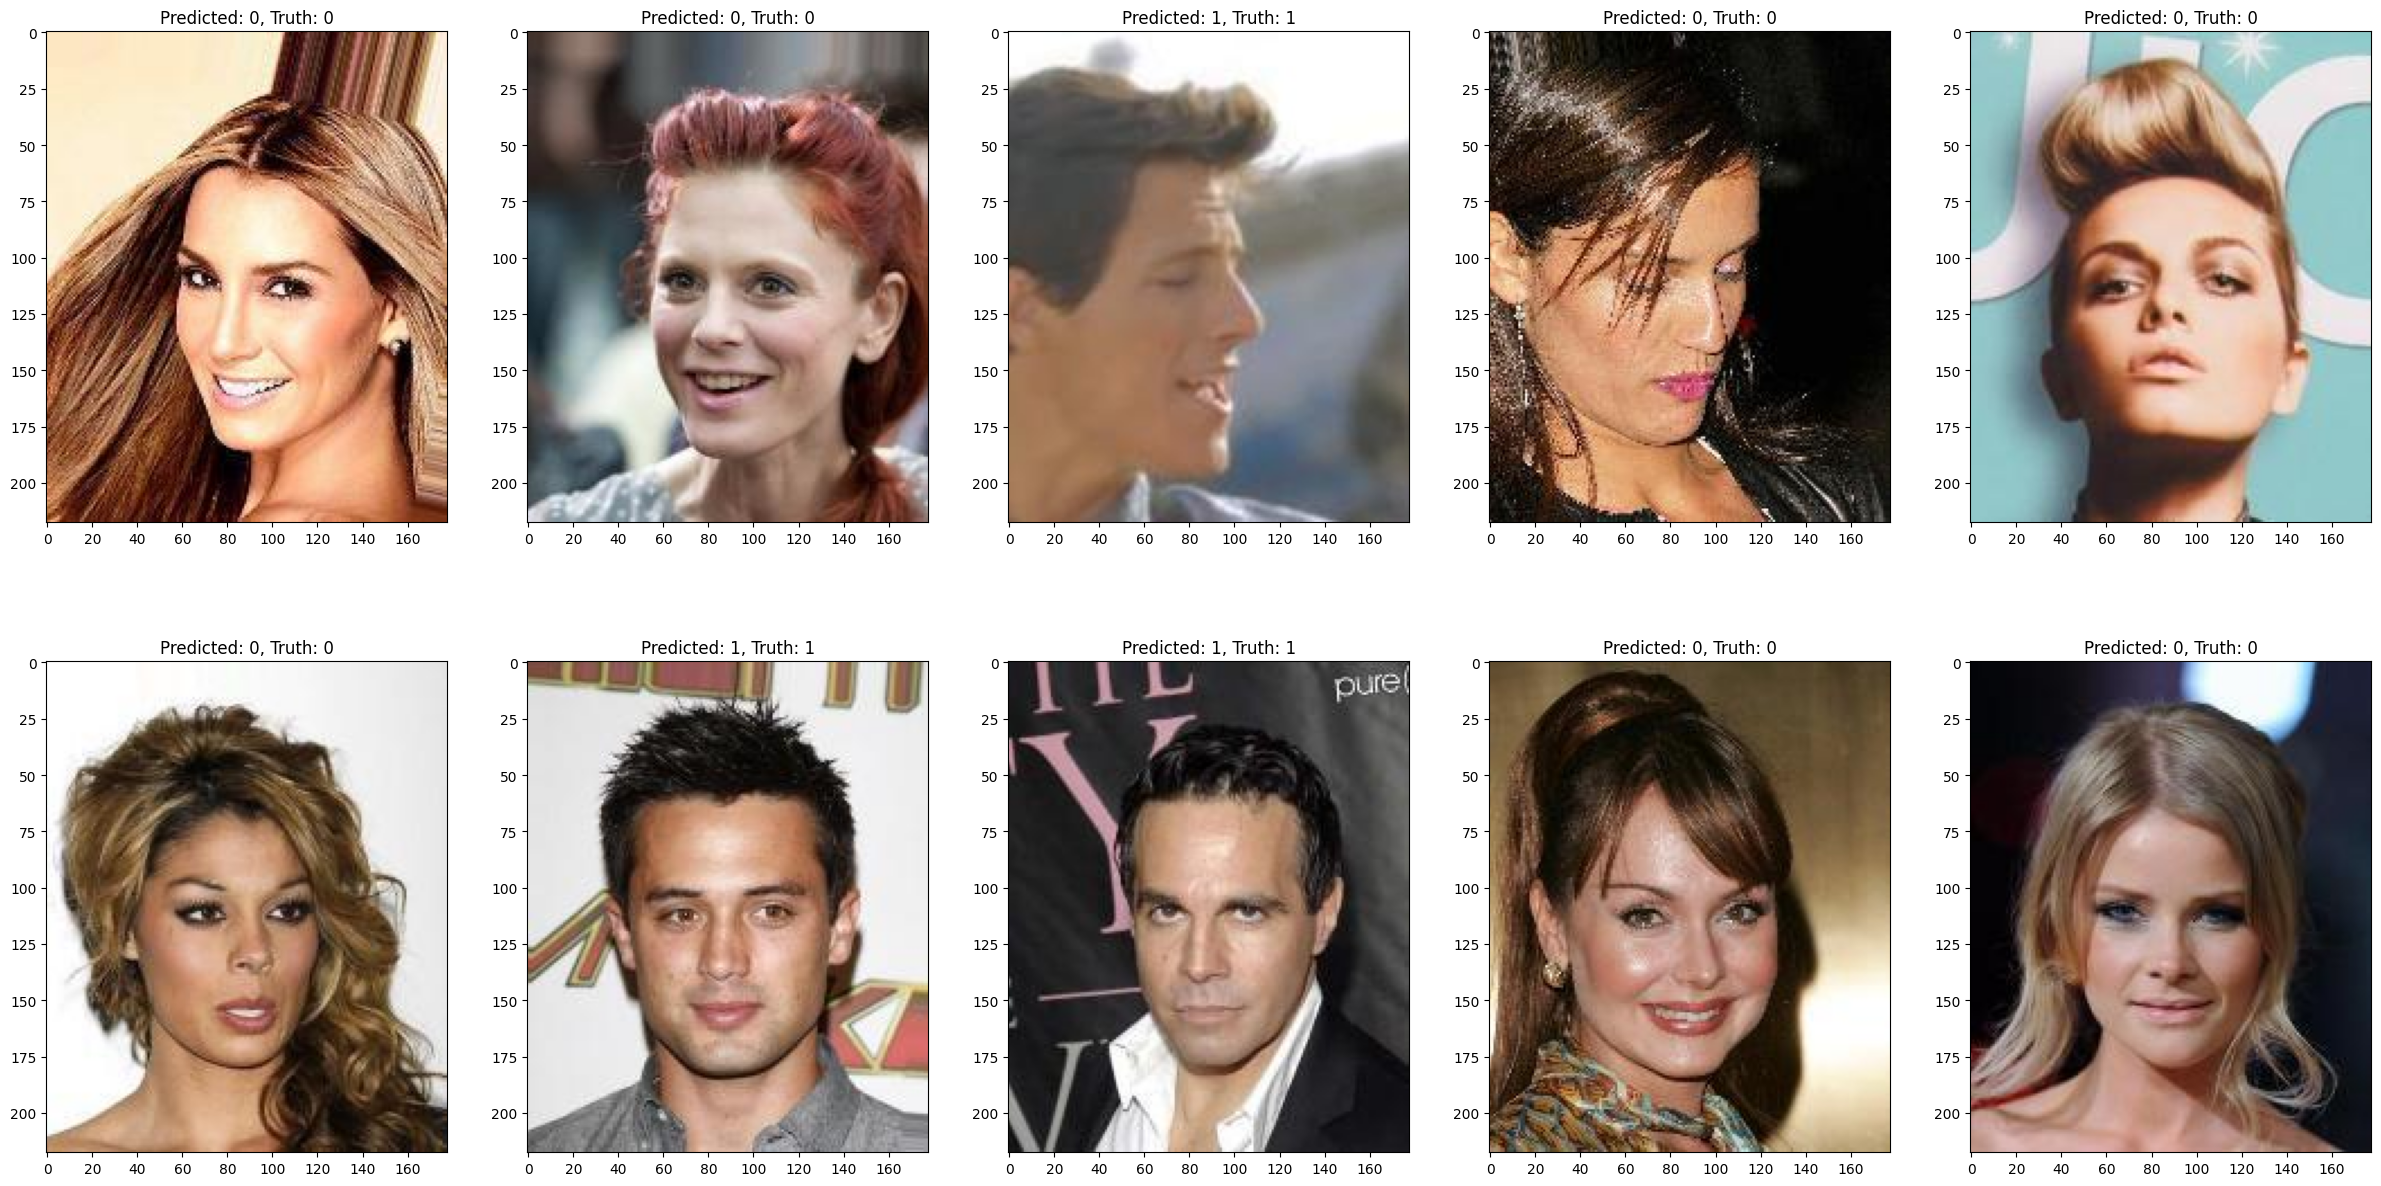

In [18]:
plot_sample(casia_model, celeb_sample, transformation('casia'), device)

VGG16 - Image Net

- Simply predicts everything as 0

In [37]:
vgg16_result_path = result_root / 'celeb_results_vgg16' / 'lightning_logs' / 'version_0'

In [38]:
get_metrics(str(vgg16_result_path / 'metrics.csv'))

Untrained Test Accuracy:	64.6553%
Final Test Accuracy:		60.9809%


In [39]:
# run model
vgg16_model = MLPClassifierWrapper(input_features = 4096)
vgg16_model.load_state_dict(torch.load(str(vgg16_result_path / 'checkpoints' / 'epoch=0-val_loss=38.75.ckpt'))['state_dict'])
# set trained model
vgg16_model.trained_model = get_pretrained_model('vgg16', device)

C:\Users\johnd\AppData\Local\Temp\ipykernel_2344\3415888889.py:23: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


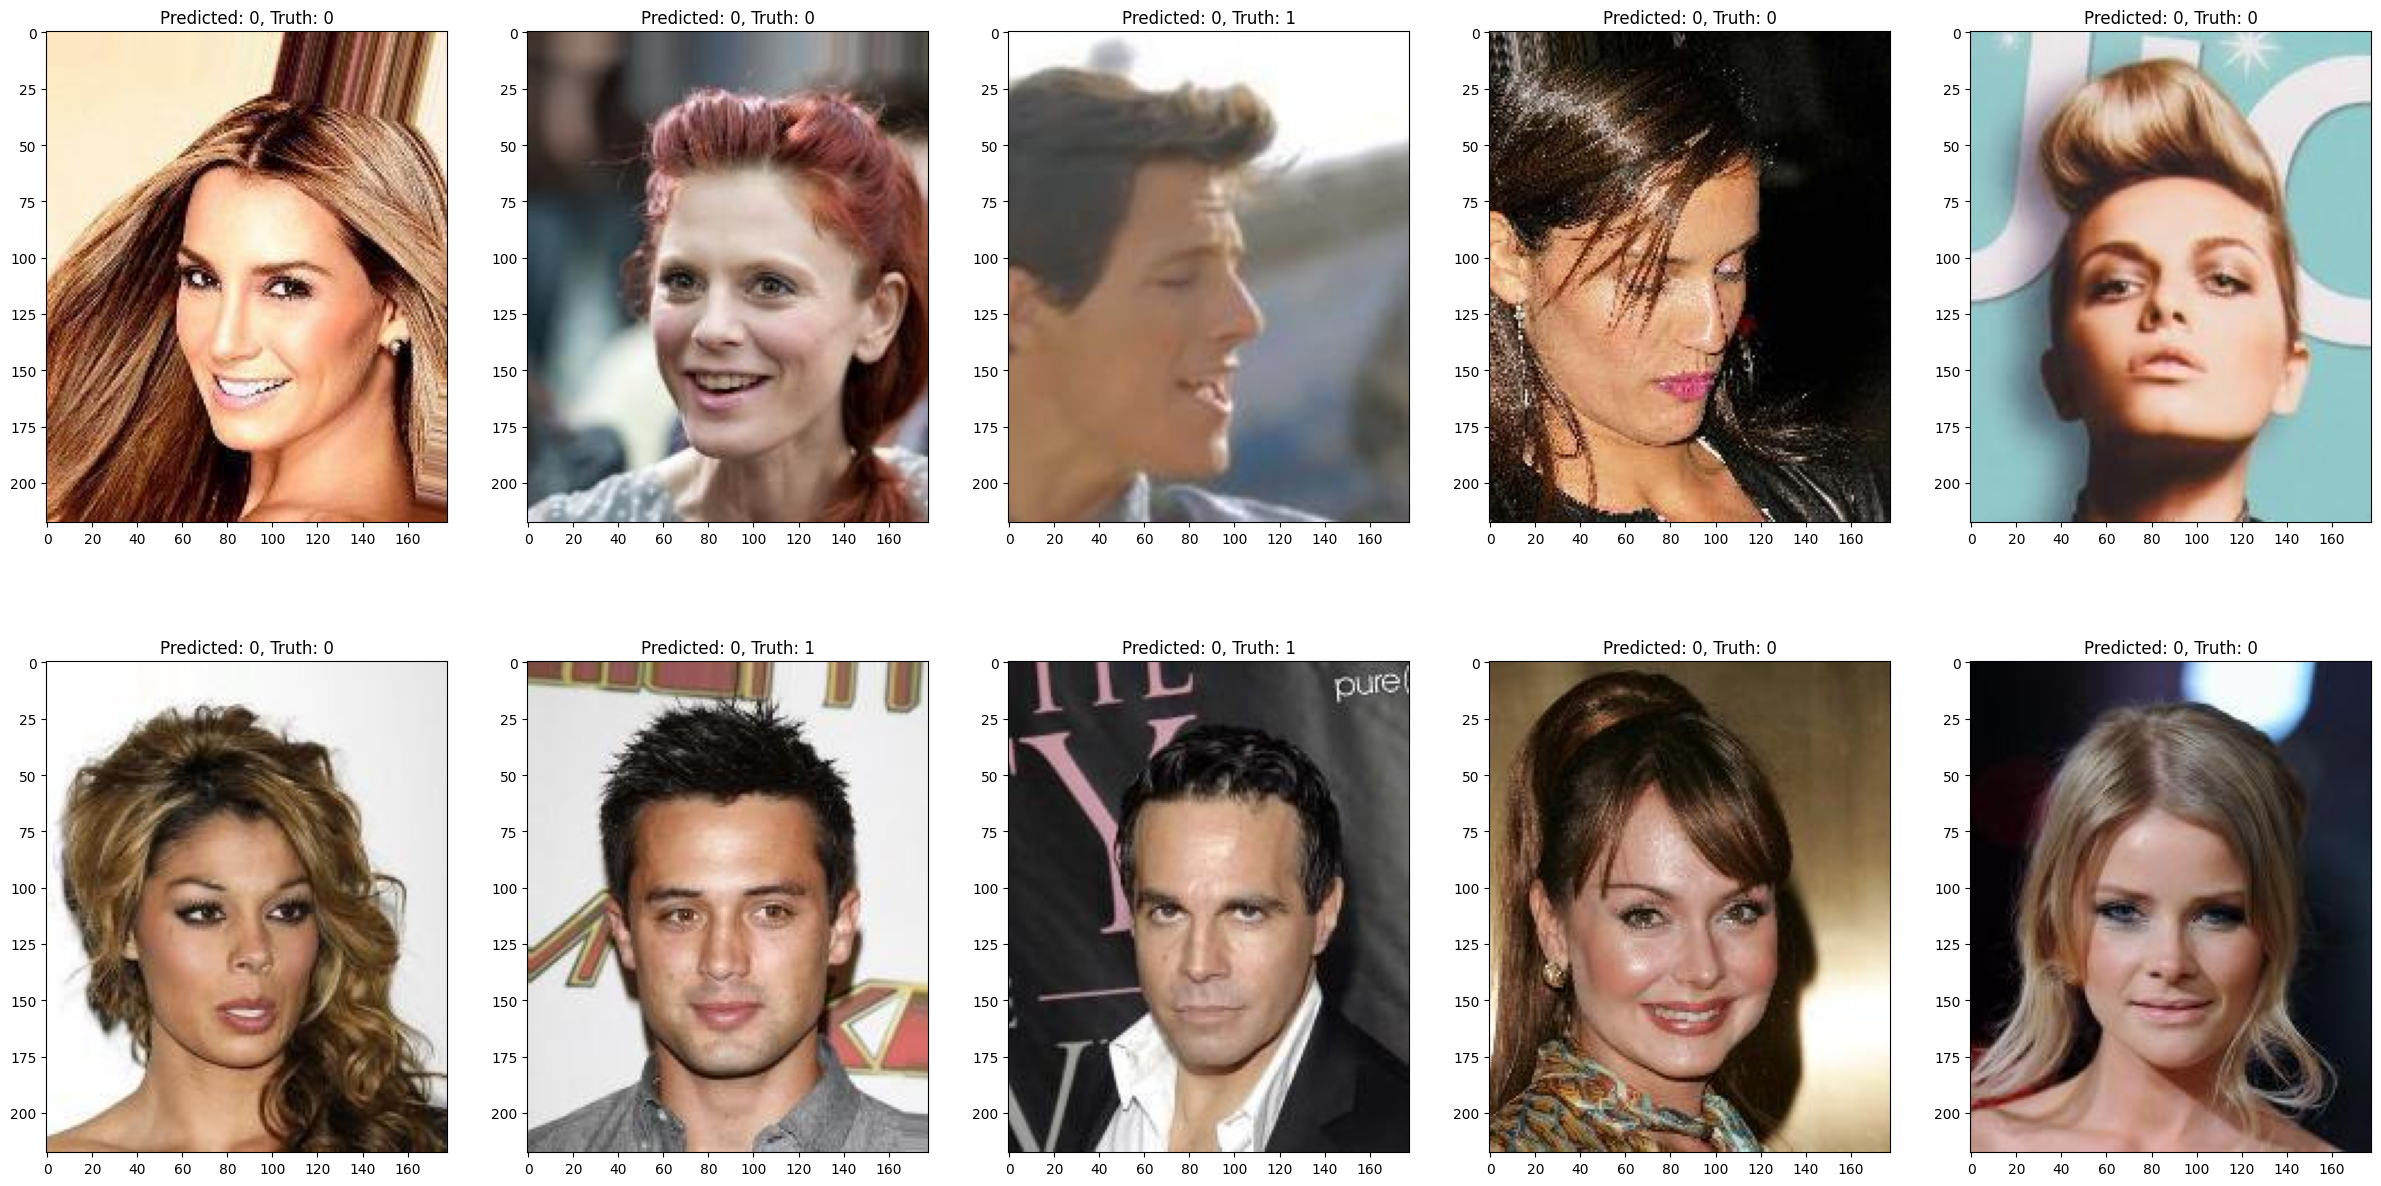

In [40]:
plot_sample(vgg16_model,celeb_sample, transformation('vgg16'), device)